In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import artm

In [4]:
batch_vectorizer = artm.BatchVectorizer(data_path="school.txt", data_format="vowpal_wabbit", target_folder="school_batches", 
                                       batch_size=100)

In [5]:
batch_vectorizer = artm.BatchVectorizer(data_path="school_batches", data_format='batches')

In [7]:
T = 10   # количество тем
model_artm = artm.ARTM(num_topics=T, topic_names=["sbj"+str(i) for i in range(T)], class_ids={"text":1}, 
                       num_document_passes=1, reuse_theta=True, cache_theta=True, seed=-1)

In [9]:
model_artm.scores.add(artm.PerplexityScore(name='PerplexityScore',
                                           dictionary='dictionary'))
model_artm.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore', class_id="text"))
model_artm.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'))
model_artm.scores.add(artm.TopTokensScore(name="top_words", num_tokens=15, class_id="text"))

In [10]:
dictionary = artm.Dictionary('dictionary')
dictionary.gather(batch_vectorizer.data_path)

In [11]:
model_artm.initialize('dictionary')

In [12]:
model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=40)

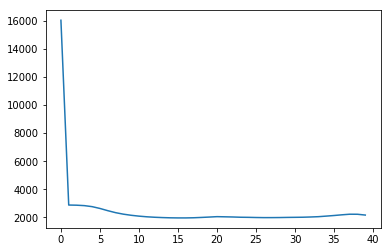

In [13]:
plt.plot(model_artm.score_tracker["PerplexityScore"].value)

In [14]:
for topic_name in model_artm.topic_names:
    print topic_name + ': ',
    tokens = model_artm.score_tracker["top_words"].last_tokens
    for word in tokens[topic_name]:    
        print word,
    print

sbj0:  который быть что это человек этот как свой для они его весь такой время себя
sbj1:  a множитель возведение b скобка x раскладывать умножение сокращенный разложение ответ квадрат слагаемое многочлен выражение
sbj2:  обособление куприн слово раскольников мастер роман словосочетание маргарита подчинительный соня оборот вера браслет старик сантьяго
sbj3:  который быть год свой время государство человек мир становиться жизнь северный первый война африка ребенок
sbj4:  x a b уравнение дробь квадратный y степень функция число f решение корень c пример
sbj5:  быть год пушкин функция свой его русский который поэт империя культура весь a f трение
sbj6:  сила быть тело энергия поле при магнитный точка географический наречие если частица например заряд величина
sbj7:  который что это как человек для этот такой быть являться мочь себя она его свой
sbj8:  который быть что это свой как этот человек для x они такой государство a весь
sbj9:  который быть что этот это как человек свой для такой в

In [15]:
print model_artm.score_tracker["SparsityPhiScore"].last_value
print model_artm.score_tracker["SparsityThetaScore"].last_value

0.733312606812
0.16533613205


In [16]:
model_artm.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-100, dictionary=dictionary))

In [2]:
model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=15)

NameError: name 'model_artm' is not defined

In [1]:
for topic_name in model_artm.topic_names:
    print topic_name + ': ',
    tokens = model_artm.score_tracker["top_words"].last_tokens
    for word in tokens[topic_name]:    
        print word,
    print

NameError: name 'model_artm' is not defined

In [22]:
print model_artm.score_tracker["SparsityPhiScore"].last_value
print model_artm.score_tracker["SparsityThetaScore"].last_value

 0.816808521748
0.302521020174


In [23]:
model_artm.regularizers['SparsePhi'].tau = -5*1e4

In [24]:
model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=15)

In [25]:
for topic_name in model_artm.topic_names:
    print topic_name + ': ',
    tokens = model_artm.score_tracker["top_words"].last_tokens
    for word in tokens[topic_name]:    
        print word,
    print

sbj0:  предложение вода корень древний квадратный дом n океан жить собственный крестьянин член александр зона достигать
sbj1: 

KeyError: u'sbj1'

In [26]:
print model_artm.score_tracker["SparsityPhiScore"].last_value
print model_artm.score_tracker["SparsityThetaScore"].last_value

 0.910503745079
0.484873950481


In [27]:
model_artm.save("my_model")

In [28]:
model_artm.load("my_model")

In [29]:
phi = model_artm.get_phi()

In [30]:
phi

,sbj0,sbj1,sbj2,sbj3,sbj4,sbj5,sbj6,sbj7,sbj8,sbj9
домохозяйка,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000011
институт,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.001560,0.000000
машинка,0.00000,0.0,0.0,0.000000,0.0,0.000138,0.0,0.000000,0.000000,0.000000
прочий,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000092
навязнуть,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000581,0.000000,0.000000
физиология,0.00000,0.0,0.0,0.000000,0.0,0.000413,0.0,0.000000,0.000000,0.000000
истязать,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000050,0.000000
выборы,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000906,0.000000
кндр,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000034
федерализм,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000050,0.000000


In [31]:
theta = model_artm.get_theta()
theta

,200,201,202,203,204,205,206,207,208,209,...,190,191,192,193,194,195,196,197,198,199
sbj0,0.032051,0.052632,0.093117,0.025000,0.011765,0.008811,0.042169,0.0300,0.047751,0.072848,...,0.029536,0.174274,0.104575,0.183099,0.095071,0.097276,0.104317,0.133333,0.033210,0.076023
sbj1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sbj2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sbj3,0.009615,0.000000,0.000000,0.066667,0.000000,0.000000,0.021084,0.0175,0.185856,0.016556,...,0.033755,0.199170,0.235294,0.098592,0.045775,0.136187,0.107914,0.051852,0.040590,0.000000
sbj4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sbj5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.004219,0.045643,0.026144,0.049296,0.028169,0.031128,0.064748,0.040741,0.003834,0.005848
sbj6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sbj7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.134733,0.004149,0.045729,0.017606,0.007042,0.042802,0.010791,0.011111,0.242995,0.040936
sbj8,0.080128,0.473684,0.275304,0.054167,0.290196,0.202643,0.045181,0.0325,0.090164,0.069536,...,0.076238,0.107884,0.078454,0.102113,0.112676,0.070039,0.075540,0.266667,0.037304,0.467836
sbj9,0.878205,0.473684,0.631579,0.854167,0.698039,0.788546,0.891566,0.9200,0.676230,0.841060,...,0.721519,0.468880,0.509804,0.549295,0.711267,0.622568,0.636690,0.496296,0.642066,0.409357


In [32]:
theta_test = model_artm.transform(batch_vectorizer)